## Data Preparation

In [4]:
!pip install scikit-learn tensorflow pandas matplotlib numpy

In [6]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=e3bb1be17d0f559fd735df8f709746482217f859da889bfbfabc3599a33c3593
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [27]:
!pip install python-louvain

     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/204.6 kB ? eta -:--:--
     --- --------------------------------- 20.5/204.6 kB 165.2 kB/s eta 0:00:02
     ------------ ------------------------ 71.7/204.6 kB 491.5 kB/s eta 0:00:01
     ------------------------------------ - 194.6/204.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 204.6/204.6 kB 887.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------- ------------------------------- 0.4/1.6 MB 11.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.6 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 10.5 MB/s eta 0:00:00
  Created wheel for python-louvain: filename=python_lo

In [7]:
# # download the data
import wget
url = "https://raw.githubusercontent.com/waccoco/2024_NCTU_MI_course/master/Dataset/Salary_Data2.csv"
output_path = './Salary_Data2.csv'
wget.download(url, out=output_path)

'./Salary_Data2 (1).csv'

In [8]:
import pandas as pd

output_path = './Salary_Data2.csv'
path = output_path
df = pd.read_csv(output_path)
display(df.head())

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7


In [9]:
df.info()
df.describe(include='all').round(2)

#round 函数在 Python（包括 Pandas 库中）的功能是对浮点数进行四舍五入到给定的精度。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  36 non-null     float64
 1   EducationLevel   36 non-null     object 
 2   City             36 non-null     object 
 3   Salary           36 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


,YearsExperience,EducationLevel,City,Salary
count,36.00,36,36,36.00
unique,NaN,3,3,NaN
top,NaN,碩士以上,城市A,NaN
freq,NaN,16,20,NaN
mean,5.47,NaN,NaN,51.70
std,2.71,NaN,NaN,17.53
min,1.20,NaN,NaN,24.90
25%,3.38,NaN,NaN,38.05
50%,5.15,NaN,NaN,49.20
75%,7.65,NaN,NaN,65.75


## Transform the Categorical data to numerical data
### @ LabelEncoder：把類別型資料轉換成0,1,2,…的數值標籤 (特徵之間有順序或大小分別)
   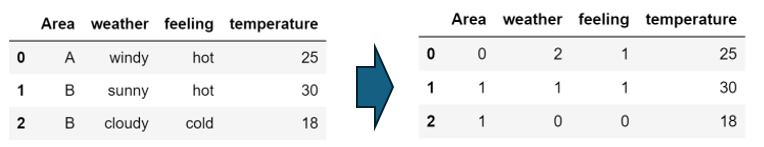

### @ OneHotEncoder：把類別型資料轉換成0與1的數值標籤 (特徵之間沒有順序或大小分別)
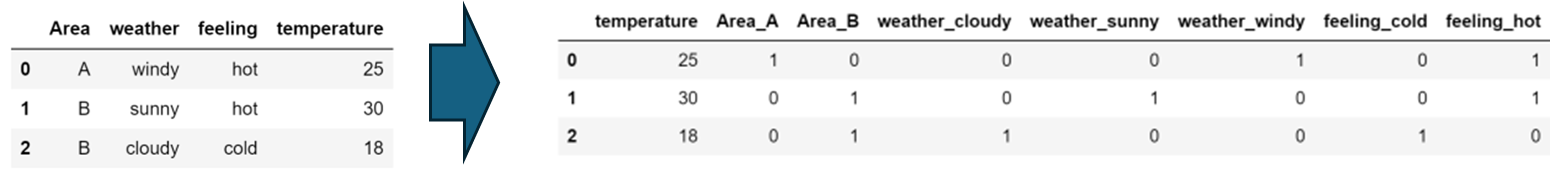

### Exercise : Try to use the one-hot encoder to encode the Categorical data into numerical data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

########################################################
df_encoded= pd.get_dummies(df)*1
#df_encoded.replace({True: 1, False: 0}, inplace=True) 文字True,False 轉數字 0,1

########################################################

# 顯示轉換後的DataFrame
display(df_encoded.head(5))

C:\Users\User\AppData\Local\Temp\ipykernel_4844\2836528745.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({True: 1, False: 0}, inplace=True)


,YearsExperience,Salary,EducationLevel_大學,EducationLevel_碩士以上,EducationLevel_高中以下,City_城市A,City_城市B,City_城市C
0,3.0,45.9,1,0,0,1,0,0
1,7.8,80.5,0,1,0,0,0,1
2,2.3,25.2,0,0,1,1,0,0
3,5.1,30.4,0,0,1,1,0,0
4,10.0,65.7,0,1,0,0,1,0


In [18]:
# Delete redundant features
########################################################
df_encoded.drop(['EducationLevel_高中以下', 'City_城市C'], axis=1, inplace=True)
########################################################

df_encoded.to_csv('./encoded.csv')
y= df_encoded['Salary']
x= df_encoded.drop(columns=['Salary'])
display(x.head(5))
# print(set(x), set(y))

,YearsExperience,EducationLevel_大學,EducationLevel_碩士以上,City_城市A,City_城市B
0,3.0,1,0,1,0
1,7.8,0,1,0,0
2,2.3,0,0,1,0
3,5.1,0,0,1,0
4,10.0,0,1,0,1


In [19]:
# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

##  data visualization


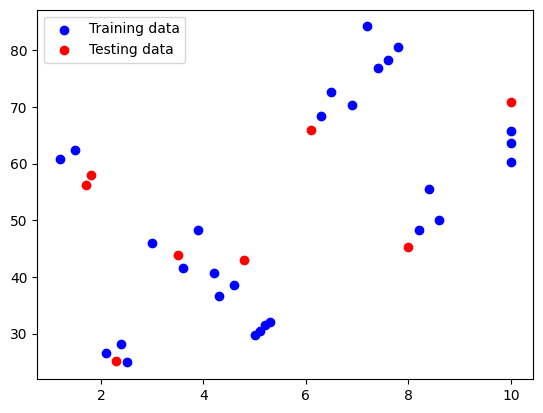

In [20]:
plt.scatter(x_train['YearsExperience'], y_train, color='blue', label='Training data')
plt.scatter(x_test['YearsExperience'], y_test, color='red', label='Testing data')
plt.legend()
plt.show()

## Build ANN model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
    # Dense(1, input_shape=(1,), activation='linear')
#     Dense(5, input_shape=(x.shape[1],), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(x.shape[1],), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='linear')
])

# Sequential.help

model.compile(optimizer=Adam(learning_rate=0.005), loss='mse')


C:\Users\User\.conda\envs\KFC\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training ANN model

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=2)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2558.4438 - val_loss: 4316.9878
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2960.8635 - val_loss: 4310.1069
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2611.6333 - val_loss: 4303.3936
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2425.9697 - val_loss: 4296.5776
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2920.5520 - val_loss: 4289.7231
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2615.0613 - val_loss: 4282.9380
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2832.2510 - val_loss: 4276.1782
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2641.0422 - val_loss: 4269.4146
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2366.6880 - val_loss: 4262.7603
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3005.9497 - val_loss: 4255.9258
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3158.0603 - val_loss: 4249.1

## Model evaluation

In [23]:
history.history['loss'][:10]

[2669.8427734375,
 2659.882568359375,
 2654.588134765625,
 2649.518310546875,
 2644.467041015625,
 2639.302490234375,
 2634.192138671875,
 2629.087646484375,
 2623.91455078125,
 2618.991943359375]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1859.7668


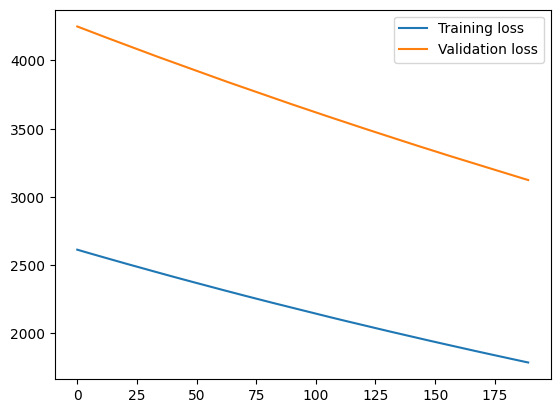

In [25]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 繪製訓練歷史
plt.plot(history.history['loss'][10:], label='Training loss')
plt.plot(history.history['val_loss'][10:], label='Validation loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


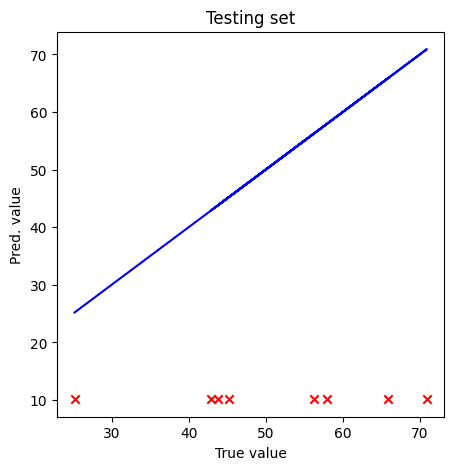

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


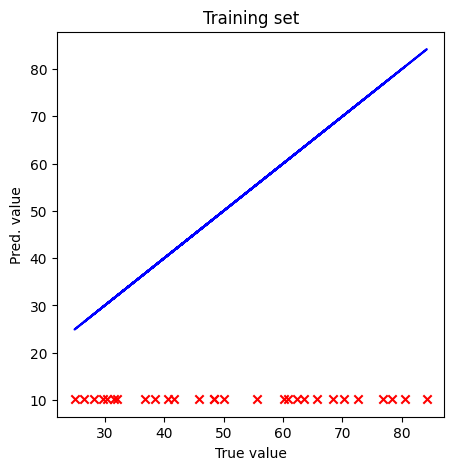

In [26]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


1/1 [==============================] - 0s 45ms/step


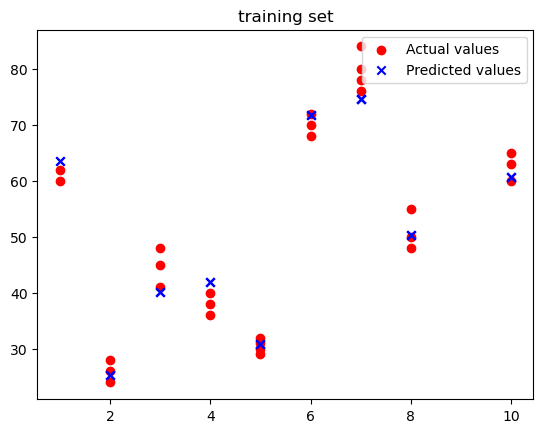

1/1 [==============================] - 0s 61ms/step


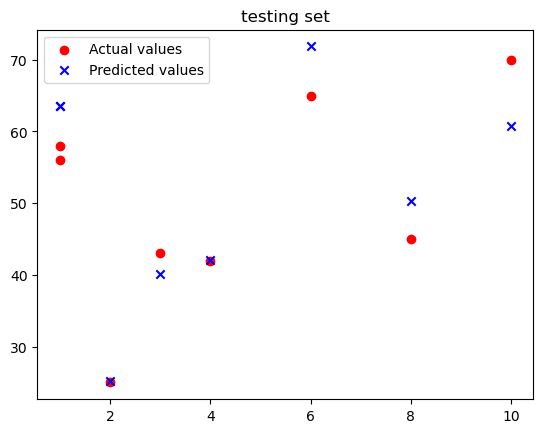

In [75]:
y_pred = model.predict(x_train)
plt.scatter(x_train['YearsExperience'], y_train, color='red', label='Actual values')
plt.scatter(x_train['YearsExperience'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()

y_pred = model.predict(x_test)
plt.scatter(x_test['YearsExperience'], y_test, color='red', label='Actual values')
plt.scatter(x_test['YearsExperience'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

In [73]:
## coefficient of determination, denoted R2
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_test = r2_score(y_test, y_pred)

y_pred = model.predict(x_train)
r2_train = r2_score(y_train, y_pred)

print(r2_train, r2_test)

1/1 [==============================] - 0s 64ms/step
0.959663983224341 0.826955595157973


In [74]:
## Pearson correlation function
from sklearn.datasets import make_regression
from sklearn.feature_selection import r_regression

y_pred = model.predict(x_test)
psc_test = r_regression(y_test.to_numpy().reshape(-1, 1) , y_pred.ravel())[0]
y_pred = model.predict(x_train)
psc_train = r_regression(y_train.to_numpy().reshape(-1, 1), y_pred.ravel())[0]
print(psc_test, psc_train)

1/1 [==============================] - 0s 56ms/step
0.9281169184929442 0.9808791382490734
